In [1]:
import DataGenerator
import KalmanFilter
import PlotFunctions

from datetime import datetime, timedelta
import numpy as np

## Parameters

In [2]:
date_start = datetime(2022, 1, 1)
date_end = datetime(2022, 7, 31)

initial_value = 6
cov_matrix = 0.3
sampling_variance = 1.5
seed = 40

## Generate Time-Series

In [3]:
time_series = DataGenerator.SingleLognormalTimeSeries(
    date_start,
    date_end,
    initial_value,
    cov_matrix,
    sampling_variance, 
    seed
)

time_series.generate_time_series()
df = time_series.time_series_data

In [23]:
kf = KalmanFilter.KalmanFilterModel(time_variance=0.3, value_col_name='sampled_value')
forecast_df = kf.apply_kf(time_series.time_series_data, 'forecast_date')
forecast_df['forecast_value'] = forecast_df['forecast_value'].shift(5)

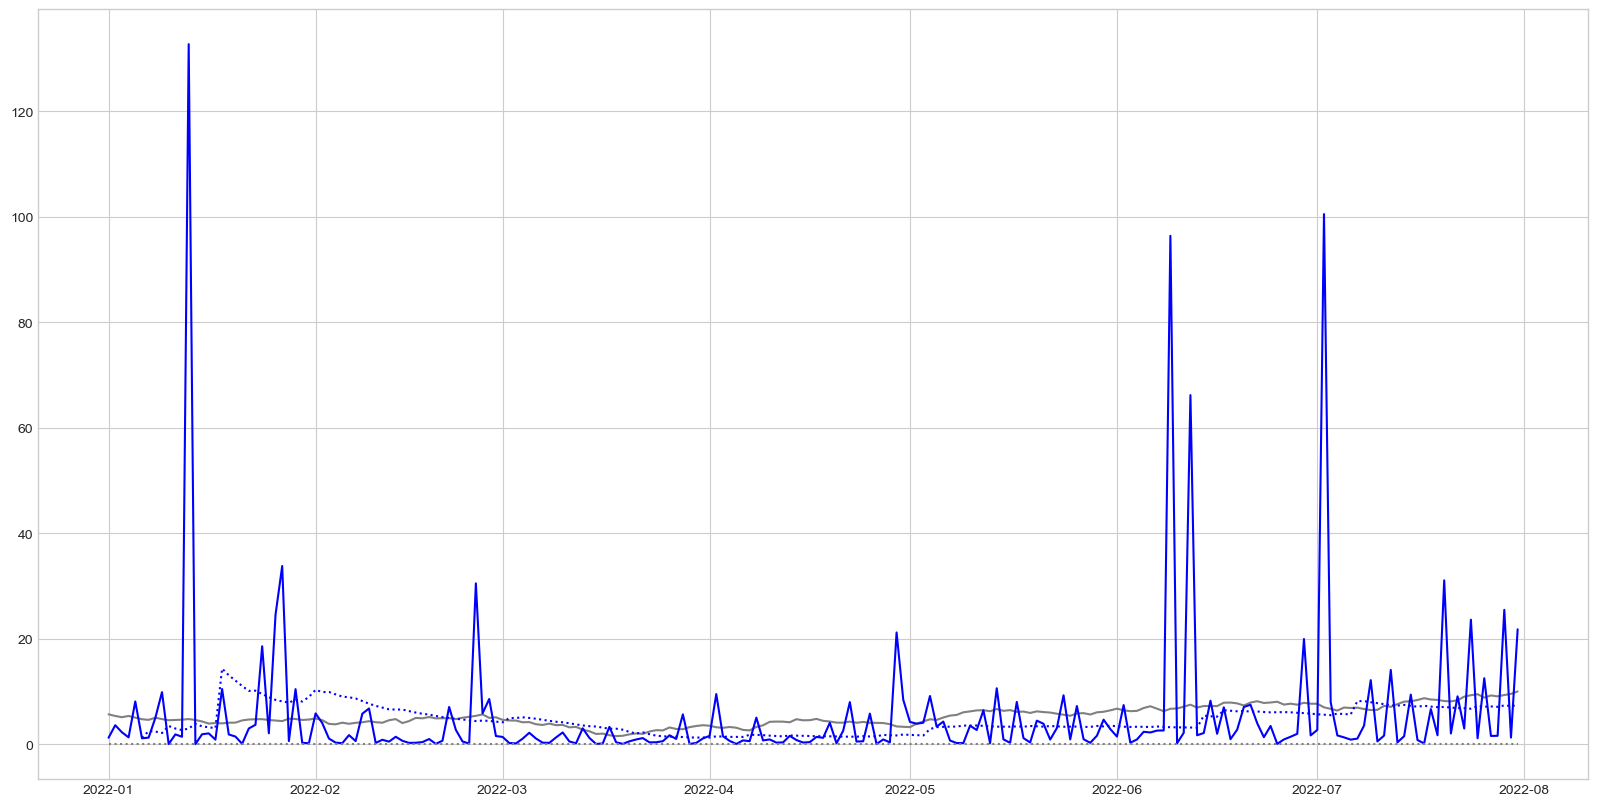

In [24]:
PlotFunctions.simple_plot(forecast_df, 'ts', obs_col='sampled_value', predicted_col='forecast_value')

In [25]:
forecast_df

,ts,unknown_value,sampled_value,sampling_var,forecast_date,updated_value,forecast_value
0,2022-01-01,5.657372,1.214907,271.657297,2022-01-06,1.211615,NaN
1,2022-01-02,5.336571,3.585194,241.722175,2022-01-07,2.466656,NaN
2,2022-01-03,5.109394,2.246919,221.580050,2022-01-08,2.386154,NaN
3,2022-01-04,5.339992,1.288235,242.032111,2022-01-09,2.109639,NaN
4,2022-01-05,5.028611,8.095932,214.628760,2022-01-10,3.438818,NaN
...,...,...,...,...,...,...,...
207,2022-07-27,9.234036,1.554050,723.727330,2022-08-01,7.240003,7.142698
208,2022-07-28,9.055801,1.583737,696.058329,2022-08-02,7.141125,7.071735
209,2022-07-29,9.306907,25.458392,735.195079,2022-08-03,7.446581,7.338648
210,2022-07-30,9.529089,1.239529,770.716485,2022-08-04,7.347050,7.241075
